# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images


### Importing necessary libraries


In [324]:
import numpy as np
import pandas as pd
from typing import Any
from cv2.typing import MatLike

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
from modules.dataset import DATASET_DIR


DATASET = pd.read_csv(DATASET_DIR / "augmented_features.csv")  # type: ignore
DATASET

,Unnamed: 0,class,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,0,82581.5,1281.099628,449,311,1.443730,1.690924,19.873897,163.041283,188.840485,184.649776,97.525920,68.606563,75.664555,33.128752,0.997071,0.622154,9.126085
1,1,0,64432.0,1051.979792,300,310,0.967742,1.443382,17.175650,182.154232,197.064377,183.625179,88.826026,69.468629,85.518658,22.187773,0.997648,0.615184,8.956234
2,2,0,42600.5,859.501652,253,288,0.878472,1.710402,17.341184,164.876892,180.197578,183.302620,66.179109,46.995272,52.743437,18.637231,0.996735,0.689416,8.462439
3,3,0,81089.5,1283.560524,291,455,0.639560,1.632825,20.317398,94.676704,90.722015,77.645382,109.969641,98.018742,93.470951,42.840132,0.996071,0.686418,6.984534
4,4,0,46909.5,903.820410,340,205,1.658537,1.485840,17.414198,167.733490,185.897255,189.604534,71.890535,49.869543,56.575904,22.947258,0.996486,0.620932,9.068238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,9655,5,140287.5,1482.330077,387,464,0.834052,1.280000,15.662853,98.444080,147.026695,139.728687,88.608806,53.104188,61.155046,38.534574,0.995327,0.607364,9.453628
9656,9656,5,116721.0,1406.974738,420,383,1.096606,1.378158,16.959912,128.700703,167.368298,157.421974,90.027589,53.710942,68.723519,28.984317,0.996655,0.636992,9.360427
9657,9657,5,92248.5,1365.854901,236,512,0.460938,1.309853,20.223197,146.471073,176.367184,173.874516,97.259830,66.463442,74.789969,42.842076,0.996348,0.707381,8.773651
9658,9658,5,74631.5,1112.756481,406,271,1.498155,1.474257,16.591211,124.147118,131.697300,117.289314,107.984211,101.251890,105.402335,69.447502,0.993459,0.685608,8.088182


In [270]:
Y = DATASET.iloc[:, 1:2]
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
9655,5
9656,5
9657,5
9658,5


In [271]:
X = DATASET.iloc[:, 2:]
X

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,82581.5,1281.099628,449,311,1.443730,1.690924,19.873897,163.041283,188.840485,184.649776,97.525920,68.606563,75.664555,33.128752,0.997071,0.622154,9.126085
1,64432.0,1051.979792,300,310,0.967742,1.443382,17.175650,182.154232,197.064377,183.625179,88.826026,69.468629,85.518658,22.187773,0.997648,0.615184,8.956234
2,42600.5,859.501652,253,288,0.878472,1.710402,17.341184,164.876892,180.197578,183.302620,66.179109,46.995272,52.743437,18.637231,0.996735,0.689416,8.462439
3,81089.5,1283.560524,291,455,0.639560,1.632825,20.317398,94.676704,90.722015,77.645382,109.969641,98.018742,93.470951,42.840132,0.996071,0.686418,6.984534
4,46909.5,903.820410,340,205,1.658537,1.485840,17.414198,167.733490,185.897255,189.604534,71.890535,49.869543,56.575904,22.947258,0.996486,0.620932,9.068238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,140287.5,1482.330077,387,464,0.834052,1.280000,15.662853,98.444080,147.026695,139.728687,88.608806,53.104188,61.155046,38.534574,0.995327,0.607364,9.453628
9656,116721.0,1406.974738,420,383,1.096606,1.378158,16.959912,128.700703,167.368298,157.421974,90.027589,53.710942,68.723519,28.984317,0.996655,0.636992,9.360427
9657,92248.5,1365.854901,236,512,0.460938,1.309853,20.223197,146.471073,176.367184,173.874516,97.259830,66.463442,74.789969,42.842076,0.996348,0.707381,8.773651
9658,74631.5,1112.756481,406,271,1.498155,1.474257,16.591211,124.147118,131.697300,117.289314,107.984211,101.251890,105.402335,69.447502,0.993459,0.685608,8.088182


### Train Test Split


In [272]:
from sklearn.model_selection import train_test_split  # type: ignore

In [273]:
X_train, X_test, y_train_, y_test_ = train_test_split(
    X, Y, test_size=0.3, random_state=142
)

In [274]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
4818,74983.5,1064.815359,310,336,0.922619,1.389106,15.121083,32.549797,41.075291,31.314148,72.559906,66.020212,55.285624,36.613926,0.996783,0.774866,4.858747
897,68053.0,1144.655977,356,339,1.050147,1.773383,19.253190,157.081703,180.079659,179.679371,80.582966,53.325217,57.943705,28.629091,0.996268,0.582222,9.128189
4256,91316.0,1293.435634,324,366,0.885246,1.298611,18.320730,36.663410,68.412998,58.335884,64.252982,90.148614,79.383332,50.736659,0.992758,0.675067,6.006192
193,49405.5,984.340182,372,191,1.947644,1.438139,19.611695,172.374985,190.226608,191.685341,76.980985,55.904114,61.766103,21.992652,0.997213,0.679128,8.809594
2831,19283.5,548.516806,159,165,0.963636,1.360490,15.602494,6.203861,12.327236,8.815975,29.871937,42.159107,33.207687,14.794734,0.995852,0.932029,1.430923


In [275]:
y_train: np.ndarray[Any, np.dtype[np.int64]] = y_train_["class"].to_numpy()  # type: ignore
y_test: np.ndarray[Any, np.dtype[np.int64]] = y_test_["class"].to_numpy()  # type: ignore

### Feature Scaling


In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [278]:
X_train[0:2]

array([[ 0.66421081,  0.47710128,  0.51376898,  0.51373553, -0.19588316,
        -0.54685417, -0.99657049, -1.45704264, -1.49810933, -1.55254641,
         0.06453879,  0.34617448, -0.31238171,  0.89066896,  0.57846528,
         0.31879838, -0.76390191],
       [ 0.46680211,  0.73053546,  0.95769114,  0.54162146,  0.04445745,
         0.62238558,  0.04870468,  0.23821699,  0.35694086,  0.3882514 ,
         0.39514505, -0.23387573, -0.18604416,  0.2683135 ,  0.3096838 ,
        -1.47678571,  1.04851666]])

In [279]:
y_train[0:2]

array([2, 0], dtype=int64)

### Applying Classifier model


In [280]:
from sklearn import svm

In [281]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [290]:
y_pred = clf.predict(X_test)
y_pred

array([5, 2, 5, ..., 3, 0, 1], dtype=int64)

In [291]:
from sklearn import metrics

In [292]:
metrics.accuracy_score(y_test, y_pred)

0.9672187715665976

In [293]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       470
           1       0.94      0.93      0.94       499
           2       0.97      0.97      0.97       495
           3       0.95      0.94      0.94       495
           4       0.99      0.99      0.99       498
           5       0.98      0.98      0.98       441

    accuracy                           0.97      2898
   macro avg       0.97      0.97      0.97      2898
weighted avg       0.97      0.97      0.97      2898



### Performing parameter tuning of the model


In [294]:
from sklearn.model_selection import GridSearchCV

In [295]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
        "C": [1, 10, 100, 1000],
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000],
    },
]

In [296]:
svm_clf = GridSearchCV(
    svm.SVC(decision_function_shape="ovr", probability=True), parameters, cv=5
)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [298]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [299]:
means = svm_clf.cv_results_["mean_test_score"]
stds = svm_clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svm_clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.714 (+/-0.022) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.885 (+/-0.015) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.941 (+/-0.019) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.972 (+/-0.009) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.973 (+/-0.007) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.969 (+/-0.011) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.885 (+/-0.014) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.937 (+/-0.016) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.970 (+/-0.013) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.982 (+/-0.009) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.981 (+/-0.009) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.972 (+/-0.008) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.936 (+/-0.016) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.961 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.009) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.984 (+/-0.010) for {'C': 100, 'gamma': 0.1, 'kernel':

In [300]:
y_pred_svm = svm_clf.predict(X_test)

In [301]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9806763285024155

In [302]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       470
           1       0.96      0.97      0.97       499
           2       0.98      0.98      0.98       495
           3       0.97      0.96      0.97       495
           4       0.99      0.99      0.99       498
           5       0.98      0.99      0.99       441

    accuracy                           0.98      2898
   macro avg       0.98      0.98      0.98      2898
weighted avg       0.98      0.98      0.98      2898



### Dimensionality Reduction using PCA


In [303]:
from sklearn.decomposition import PCA

In [304]:
pca = PCA()

In [305]:
pca.fit(X)

PCA()

In [306]:
var = pca.explained_variance_ratio_
var

array([9.99972143e-01, 1.36126382e-05, 7.76596580e-06, 5.21781237e-06,
       8.62874964e-07, 1.79321260e-07, 9.63606020e-08, 5.24039295e-08,
       4.69240751e-08, 1.03389035e-08, 6.98042783e-09, 5.07118206e-09,
       7.30480165e-10, 4.22610008e-11, 1.23243440e-11, 8.97198190e-13,
       6.74202999e-16])

In [307]:
import matplotlib.pyplot as plt

%matplotlib inline

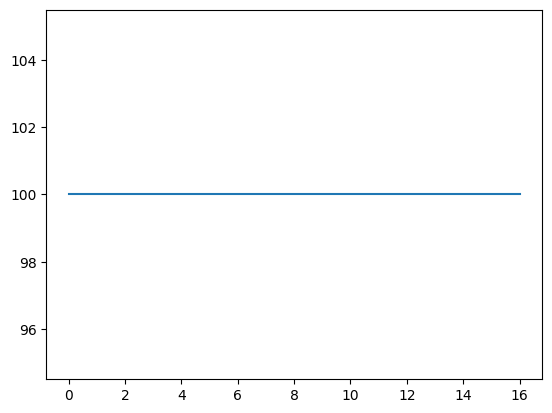

In [308]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified


In [309]:
import cv2
from modules.preprocess import subtract_background

In [378]:
from modules.preprocess import NAMES, extract_features
from modules.dataset import UNIQUE_PLANTS


def get_features(img: MatLike):
    return pd.DataFrame.from_records(  # type: ignore
        [extract_features(0, img)], columns=NAMES
    ).iloc[:, 1:]


def predict(features: pd.DataFrame):
    prediction_probabilities: list[int] = list(svm_clf.predict_proba( # type: ignore
        sc_X.transform(features) # type: ignore
    )[0])
    probability = sorted(prediction_probabilities)[-1]
    result = prediction_probabilities.index(probability)
    return result, probability

('Curry Leaf', 0.6990877183008676)

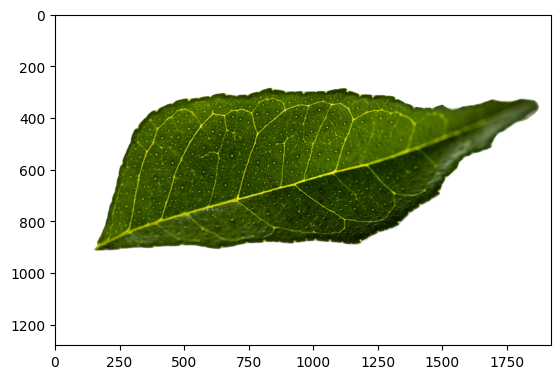

In [379]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\curry leaf.jpg"
test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob

('Rubble Leaf', 0.7095946952997764)

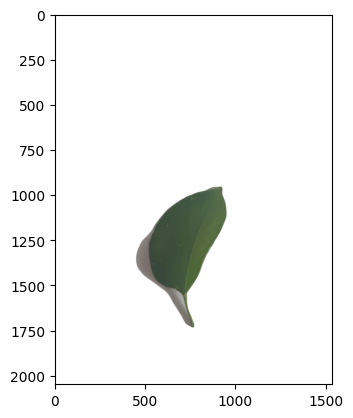

In [380]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\Random\di9L7swF.jpg"
test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob

In [ ]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\Random\_dP5tf2C.jpg"
test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob